In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

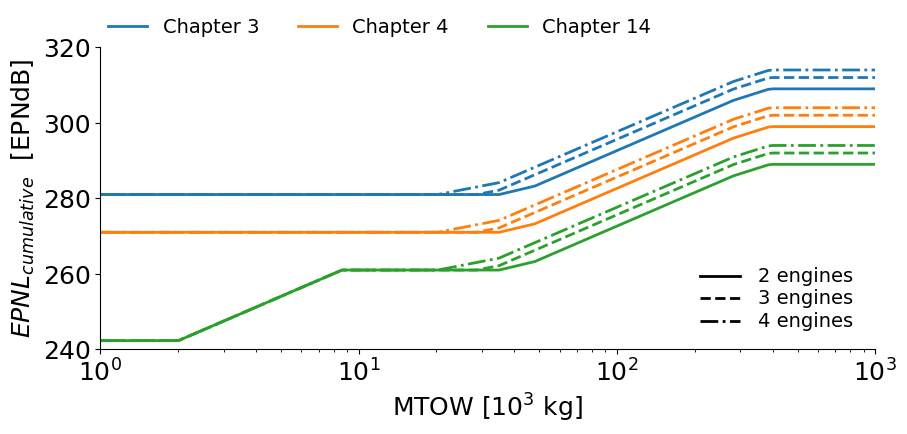

In [4]:
# Max take-off weight
mtow = np.logspace(0, np.log10(1000), 1000)

limits = dict()
limits['3'] = dict()
limits['3']['2'] = pyna.get_icao_annex_16_noise_limits(mtow, '3', 2)
limits['3']['3'] = pyna.get_icao_annex_16_noise_limits(mtow, '3', 3)
limits['3']['4'] = pyna.get_icao_annex_16_noise_limits(mtow, '3', 4)

limits['14'] = dict()
limits['14']['2'] = pyna.get_icao_annex_16_noise_limits(mtow, '14', 2)
limits['14']['3'] = pyna.get_icao_annex_16_noise_limits(mtow, '14', 3)
limits['14']['4'] = pyna.get_icao_annex_16_noise_limits(mtow, '14', 4)

limits['NPRM'] = dict()
limits['NPRM']['2'] = pyna.get_icao_annex_16_noise_limits(mtow, 'NPRM', 2)
limits['NPRM']['3'] = pyna.get_icao_annex_16_noise_limits(mtow, 'NPRM', 3)

# Plot ICAO noise limits
fig, ax = plt.subplots(1,1,figsize=(10, 4), dpi=100)
plt.style.use('../utils/plot.mplstyle')

plt.semilogx(mtow, limits['3']['2']['lateral'] + limits['3']['2']['flyover'] + limits['3']['2']['approach'], '-' ,color='tab:blue', label='Chapter 3')
plt.semilogx(mtow, limits['3']['3']['lateral'] + limits['3']['3']['flyover'] + limits['3']['3']['approach'], '--',color='tab:blue')
plt.semilogx(mtow, limits['3']['4']['lateral'] + limits['3']['4']['flyover'] + limits['3']['4']['approach'], '-.',color='tab:blue')

plt.semilogx(mtow, limits['3']['2']['lateral'] + limits['3']['2']['flyover'] + limits['3']['2']['approach'] - 10, '-' , color='tab:orange', label='Chapter 4')
plt.semilogx(mtow, limits['3']['3']['lateral'] + limits['3']['3']['flyover'] + limits['3']['3']['approach'] - 10, '--', color='tab:orange')
plt.semilogx(mtow, limits['3']['4']['lateral'] + limits['3']['4']['flyover'] + limits['3']['4']['approach'] - 10, '-.', color='tab:orange')

plt.semilogx(mtow, limits['14']['2']['lateral'] + limits['14']['2']['flyover'] + limits['14']['2']['approach'] - 17, '-' , color='tab:green', label='Chapter 14')
plt.semilogx(mtow, limits['14']['3']['lateral'] + limits['14']['3']['flyover'] + limits['14']['3']['approach'] - 17, '--', color='tab:green')
plt.semilogx(mtow, limits['14']['4']['lateral'] + limits['14']['4']['flyover'] + limits['14']['4']['approach'] - 17, '-.', color='tab:green')

plt.plot([210,300],[259.5,259.5], '-', color='k')
plt.plot([210,300],[253.5,253.5], '--', color='k')
plt.plot([210,300],[247.5,247.5], '-.', color='k')

plt.annotate(xy=(350,258), text='2 engines', fontsize=14)
plt.annotate(xy=(350,252), text='3 engines', fontsize=14)
plt.annotate(xy=(350,246), text='4 engines', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('MTOW [$10^3$ kg]')
plt.ylabel('$EPNL_{cumulative}$  [EPNdB]')
plt.legend(fontsize=14, loc='lower left', bbox_to_anchor=(0.0, 1.01), ncol=3, borderaxespad=0, frameon=False)
plt.xlim([1, 1000])
plt.ylim([240, 320])
plt.show()
